<a href="https://colab.research.google.com/github/bhaveshpatil093/GEN-AI-Projects/blob/main/Cifar-10-Image-Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
from tensorflow import keras

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [4]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [5]:
x_train = x_train/255
x_test = x_test/255

In [6]:
x_train.shape

(50000, 32, 32, 3)

In [7]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

<ipython-input-9-fcaa7b9e08eb>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(class_names[int(y_train[i])])


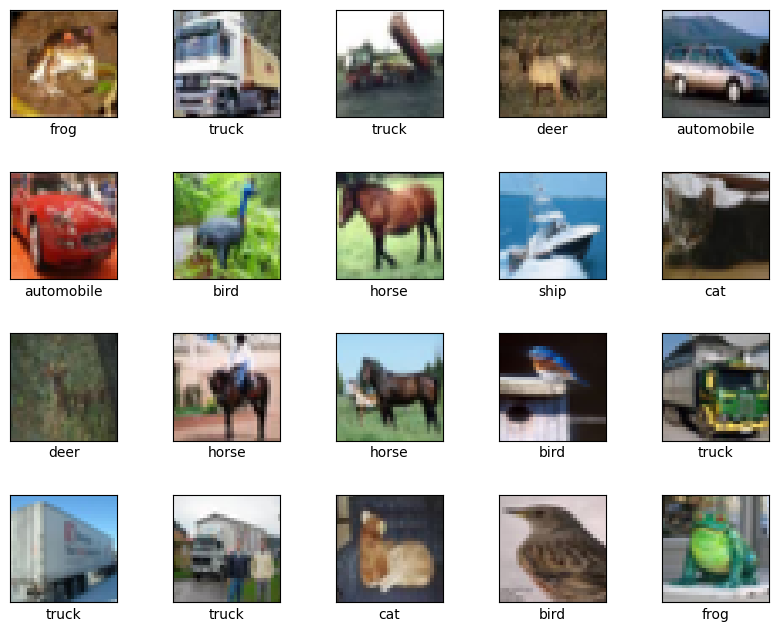

In [9]:
fig = plt.figure(figsize= (8,8))
for i in range(20):
  plt.subplot(5,5, i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap = 'gray', interpolation=None)
  plt.xlabel(class_names[int(y_train[i])])
  plt.xticks([])
  plt.yticks([])

In [10]:
from keras.utils import to_categorical
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Activation

In [13]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation='relu')) # Moved activation here
model.add(Dense(10, activation='softmax')) # Moved activation here

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 29, 29, 32)          │           1,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 29, 29, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 32)          │          16,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 11, 11, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         205,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,610 (881.29 KB)

 Trainable params: 225,610 (881.29 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [18]:
model.fit(x_train, y_cat_train, epochs=5, validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 51ms/step - accuracy: 0.3757 - loss: 1.7130 - val_accuracy: 0.5424 - val_loss: 1.2654
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 49ms/step - accuracy: 0.5760 - loss: 1.2042 - val_accuracy: 0.5740 - val_loss: 1.1998
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 49ms/step - accuracy: 0.6330 - loss: 1.0364 - val_accuracy: 0.6277 - val_loss: 1.0587
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 43ms/step - accuracy: 0.6737 - loss: 0.9211 - val_accuracy: 0.6630 - val_loss: 0.9857
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 45ms/step - accuracy: 0.7154 - loss: 0.8149 - val_accuracy: 0.6556 - val_loss: 1.0315


In [20]:
metrics = pd.DataFrame(model.history.history)
metrics

,accuracy,loss,val_accuracy,val_loss
0,0.46162,1.495991,0.5424,1.265444
1,0.58798,1.168288,0.5740,1.199763
2,0.64204,1.020772,0.6277,1.058729
3,0.67724,0.918301,0.6630,0.985694
4,0.71082,0.830649,0.6556,1.031536


<Axes: >

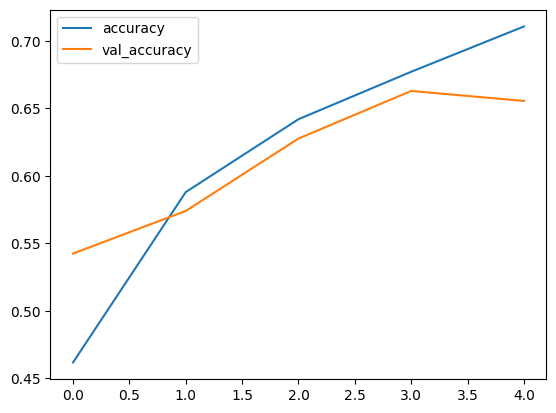

In [21]:
metrics[['accuracy', 'val_accuracy']].plot()

<Axes: >

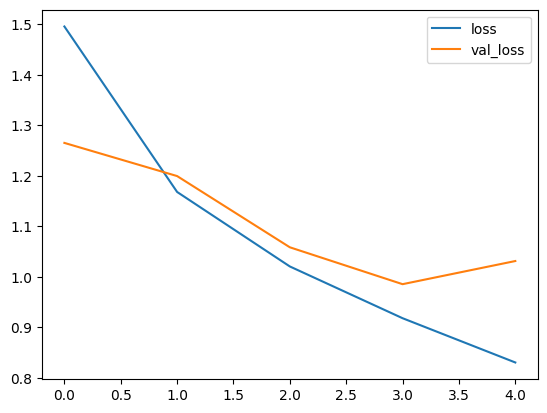

In [22]:
metrics[['loss', 'val_loss']].plot()

In [23]:
model.evaluate(x_test, y_cat_test, verbose=0)

[1.0315357446670532, 0.6556000113487244]

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
import numpy as np
predictions = np.argmax(model.predict(x_test), axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step


In [27]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.67      0.75      0.71      1000
           1       0.82      0.67      0.73      1000
           2       0.62      0.52      0.57      1000
           3       0.50      0.42      0.46      1000
           4       0.66      0.56      0.61      1000
           5       0.60      0.56      0.58      1000
           6       0.76      0.72      0.74      1000
           7       0.78      0.67      0.72      1000
           8       0.67      0.85      0.75      1000
           9       0.56      0.84      0.67      1000

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.65     10000
weighted avg       0.66      0.66      0.65     10000



In [28]:
print(confusion_matrix(y_test, predictions))

[[751  15  25  11  15   4   8   5 106  60]
 [ 29 665   1   5   3   4   8   0  70 215]
 [ 97   9 522  68  78  59  61  29  38  39]
 [ 46  20  77 422  50 166  47  37  58  77]
 [ 51   9  70  66 559  56  64  57  38  30]
 [ 24   4  53 165  40 564  25  41  32  52]
 [ 11  11  51  63  29  23 717  11  32  52]
 [ 30   5  28  27  71  58   7 666  13  95]
 [ 55  23   8   9   0   2   4   1 847  51]
 [ 34  51   9   8   1   5   6   4  39 843]]


<Axes: >

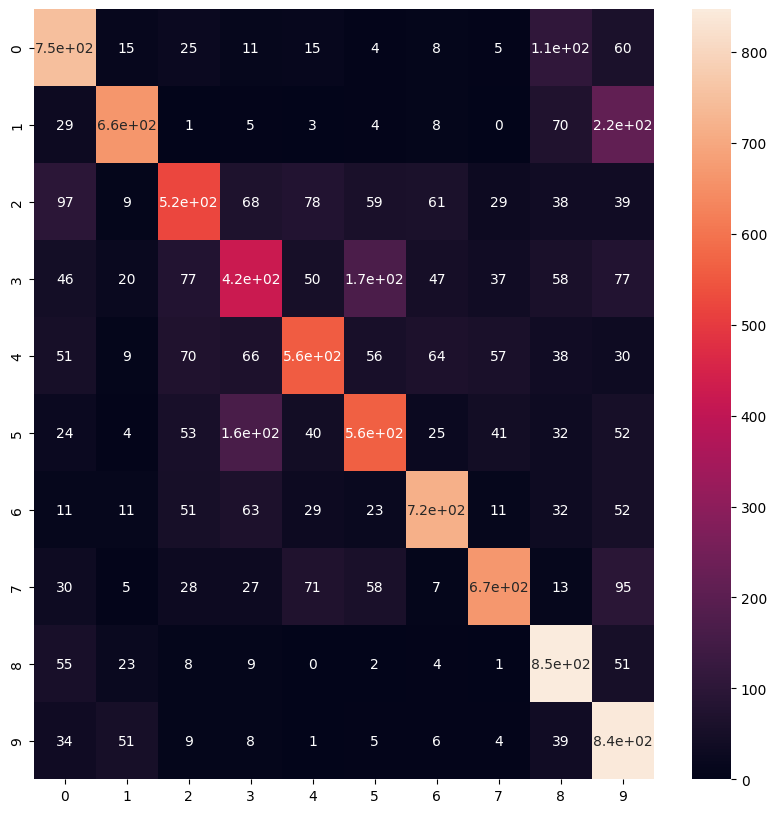

In [29]:
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

<ipython-input-32-197ec3b1b07d>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel('Prediction= {}\nTrue={}'.format(class_names[int(predictions[i])], class_names[int(y_test[i])]))


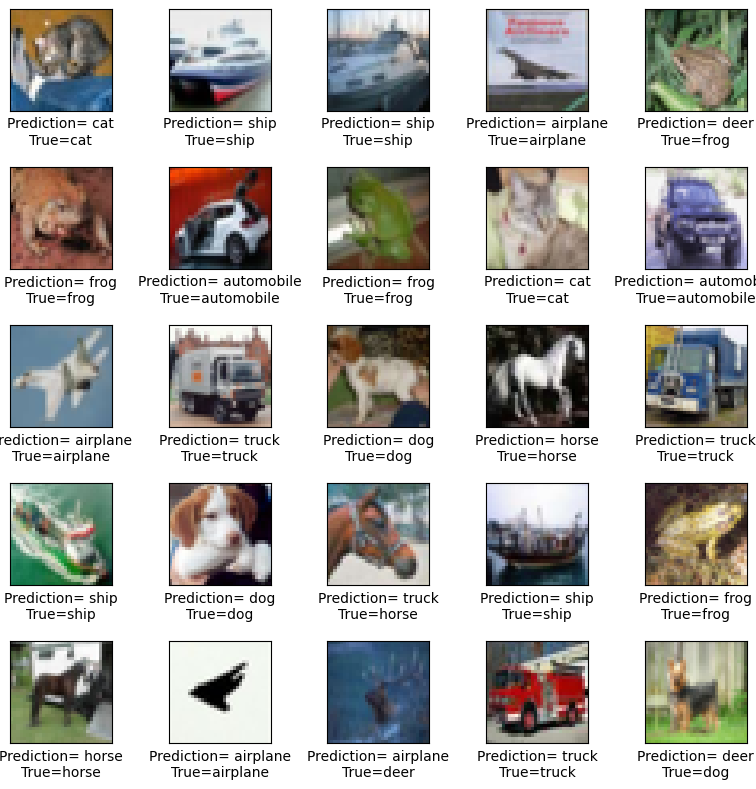

In [32]:
fig = plt.figure(figsize=(8,8))
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.tight_layout()
  plt.imshow(x_test[i], cmap = 'gray', interpolation=None)
  plt.xlabel('Prediction= {}\nTrue={}'.format(class_names[int(predictions[i])], class_names[int(y_test[i])]))
  plt.xticks([])
  plt.yticks([])